In [1]:
include("Main_module.jl")
using .TDQMC
using PyPlot, Distributions, Random

In [2]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();

In [ ]:
Dy.Trajectory

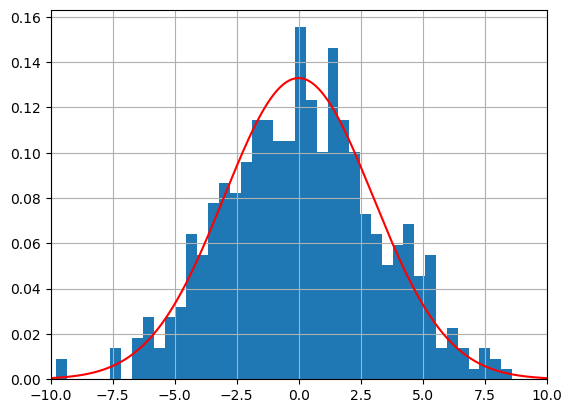

(-10.0, 10.0)

In [4]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, pdf(Normal(0, 3), P.sampling), color = "red")
grid()
xlim(-10, 10)

In [5]:
parallel_CTE!(P, Dy)

[1, 0, 1, 0]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 0, 2, 1]
[1, 1, 2, 1]
[1, 1, 2, 2]
[2, 1, 2, 2]
[2, 2, 2, 2]
[2, 2, 3, 2]
[2, 2, 3, 3]
[3, 2, 3, 3]
[4, 2, 3, 3]
[4, 3, 3, 3]
[4, 3, 3, 4]
[4, 3, 4, 4]
[5, 3, 4, 4]
[5, 4, 4, 4]
[5, 4, 4, 5]
[6, 4, 4, 5]
[6, 4, 5, 5]
[6, 4, 5, 6]
[6, 4, 6, 6]
[7, 4, 6, 6]
[7, 5, 6, 6]
[7, 5, 6, 7]
[7, 5, 7, 7]
[7, 5, 8, 7]
[8, 5, 8, 7]
[8, 5, 8, 8]
[8, 6, 8, 8]
[8, 6, 9, 8]
[9, 6, 9, 8]
[9, 7, 9, 8]
[9, 7, 9, 9]
[10, 7, 9, 9]
[10, 7, 10, 9]
[10, 8, 10, 9]
[10, 8, 10, 10]
[11, 8, 10, 10]
[11, 8, 11, 10]
[11, 8, 11, 11]
[12, 8, 11, 11]
[12, 9, 11, 11]
[12, 9, 12, 11]
[12, 9, 12, 12]
[12, 9, 13, 12]
[13, 9, 13, 12]
[13, 10, 13, 12]
[13, 10, 13, 13]
[13, 10, 14, 13]
[14, 10, 14, 13]
[14, 11, 14, 13]
[14, 12, 14, 13]
[14, 12, 14, 14]
[14, 12, 15, 14]
[15, 12, 15, 14]
[15, 12, 16, 14]
[15, 13, 16, 14]
[15, 13, 16, 15]
[16, 13, 16, 15]
[16, 13, 17, 15]
[17, 13, 17, 15]
[17, 14, 17, 15]
[17, 14, 17, 16]
[17, 14, 18, 16]
[18, 14, 18, 16]
[18, 14, 18, 17]
[18, 15, 18, 1

In [13]:
using DataFrames, CSV

In [16]:
df = CSV.read("Ground_Wave_Func.csv", DataFrame)
df.wave = @. real(parse(Complex{Float64}, df.wave))

20001-element Vector{Float64}:
 1.1110523894453942e-15
 1.126714462768829e-15
 1.1151255463373956e-15
 1.0960310192892259e-15
 1.1043909637021962e-15
 1.096314727810028e-15
 1.0776968646269636e-15
 1.1032404449202764e-15
 1.0938574723245351e-15
 1.0849673934826716e-15
 1.0816200942518743e-15
 1.0837449096125486e-15
 1.0754001676147728e-15
 ⋮
 1.180968988896895e-15
 1.1649967443657957e-15
 1.148401704064087e-15
 1.1493675292280298e-15
 1.1646359753265938e-15
 1.162362931175561e-15
 1.1602418902076246e-15
 1.1507581622946283e-15
 1.1498347780801389e-15
 1.1360058853718269e-15
 1.1249116240775495e-15
 1.1242458211985764e-15

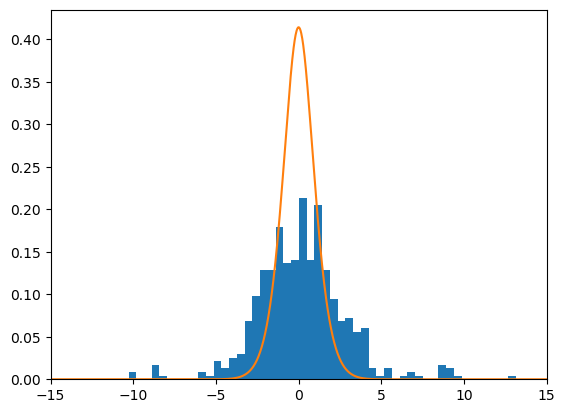

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [12]:
hist(Dy.Trajectory',50, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-15,15)
show()

In [10]:
sum(Dy.Energy)/length(Dy.Energy)

-0.36020702363000917

In [17]:
wave = DataFrame()
wave.x = P.sampling
wave.wave_1 = sum(abs, hcat(Dy.Guide_Wave[1, :]...), dims = 2)[:] / size(Dy.Guide_Wave, 2)
#CSV.write("Ground_Guide_Wave.csv", wave)

20001-element Vector{Float64}:
 1.8248559862894907e-140
 3.650643190853002e-140
 5.478324919258742e-140
 7.308928629745891e-140
 9.143577947090663e-140
 1.0983524587395e-139
 1.2830180142305094e-139
 1.4685147653045366e-139
 1.6550252882780146e-139
 1.8427575170814954e-139
 2.0319477724868833e-139
 2.2228637179189685e-139
 2.415807221803516e-139
 ⋮
 2.9844099213311317e-139
 2.7285029698703723e-139
 2.4748038193669106e-139
 2.222963247720048e-139
 1.9726740609835572e-139
 1.7236671247875642e-139
 1.475707298598215e-139
 1.2285892959647151e-139
 9.821334899989276e-140
 7.361816796081109e-140
 4.905928286008186e-140
 2.4523878681936353e-140

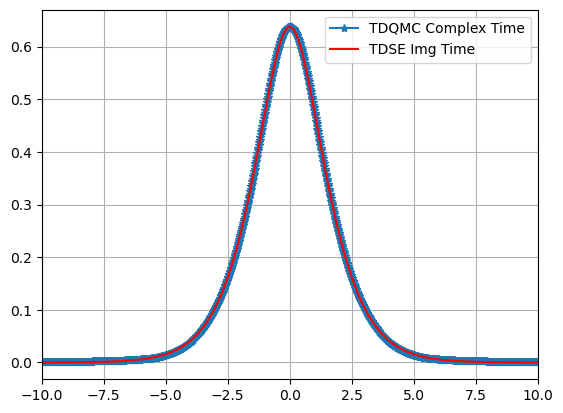

In [18]:
plot(P.sampling, abs.(wave.wave_1),marker="*", label = "TDQMC Complex Time")
plot(P.sampling, abs.(df.wave), color = "red", label = "TDSE Img Time")
legend()
xlim(-10, 10)
grid()

In [5]:
Dy.Time

200-element Vector{Union{Float64, ComplexF64}}:
                9.9 - 9.9im
              11.65 - 11.65im
              12.65 - 12.65im
 39.300000000000004 - 39.300000000000004im
              14.75 - 14.75im
 10.850000000000001 - 10.850000000000001im
 23.650000000000002 - 23.650000000000002im
 12.700000000000001 - 12.700000000000001im
 13.850000000000001 - 13.850000000000001im
              11.05 - 11.05im
               11.5 - 11.5im
               14.9 - 14.9im
               11.5 - 11.5im
                    ⋮
              13.15 - 13.15im
 11.200000000000001 - 11.200000000000001im
              10.15 - 10.15im
              11.65 - 11.65im
              16.95 - 16.95im
 14.850000000000001 - 14.850000000000001im
              23.35 - 23.35im
 13.200000000000001 - 13.200000000000001im
               15.9 - 15.9im
               26.3 - 26.3im
 10.350000000000001 - 10.350000000000001im
              13.75 - 13.75im

In [13]:
Dy.Trajectory

1×200 Matrix{Float64}:
 -0.150393  1.14173  -1.79605  8.11132  …  -6.07555  0.291195  -2.46381

In [15]:
Dy.Guide_Wave

1×200 Matrix{Vector{ComplexF64}}:
 [1.31934e-25-1.02577e-24im, 2.63716e-25-2.05127e-24im, 3.95192e-25-3.07627e-24im, 5.26211e-25-4.10048e-24im, 6.56621e-25-5.12367e-24im, 7.86269e-25-6.14556e-24im, 9.15004e-25-7.16591e-24im, 1.04267e-24-8.18445e-24im, 1.16913e-24-9.20093e-24im, 1.29422e-24-1.02151e-23im  …  1.29422e-24-1.02151e-23im, 1.16913e-24-9.20093e-24im, 1.04267e-24-8.18445e-24im, 9.15004e-25-7.16591e-24im, 7.86269e-25-6.14556e-24im, 6.56621e-25-5.12367e-24im, 5.26211e-25-4.10048e-24im, 3.95192e-25-3.07627e-24im, 2.63716e-25-2.05127e-24im, 1.31934e-25-1.02577e-24im]  …  [4.00598e-27-5.43707e-26im, 8.0069e-27-1.08732e-25im, 1.19977e-26-1.63073e-25im, 1.59733e-26-2.17385e-25im, 1.99287e-26-2.71658e-25im, 2.38587e-26-3.25882e-25im, 2.77585e-26-3.80048e-25im, 3.16229e-26-4.34145e-25im, 3.54469e-26-4.88164e-25im, 3.92255e-26-5.42095e-25im  …  3.92255e-26-5.42095e-25im, 3.54469e-26-4.88164e-25im, 3.16229e-26-4.34145e-25im, 2.77585e-26-3.80048e-25im, 2.38587e-26-3.25882e-25im, 1.99287e-

In [18]:
hcat(Dy.Guide_Wave[1 ,:]...)

20001×200 Matrix{ComplexF64}:
 1.31934e-25-1.02577e-24im  …  4.00598e-27-5.43707e-26im
 2.63716e-25-2.05127e-24im      8.0069e-27-1.08732e-25im
 3.95192e-25-3.07627e-24im     1.19977e-26-1.63073e-25im
 5.26211e-25-4.10048e-24im     1.59733e-26-2.17385e-25im
 6.56621e-25-5.12367e-24im     1.99287e-26-2.71658e-25im
 7.86269e-25-6.14556e-24im  …  2.38587e-26-3.25882e-25im
 9.15004e-25-7.16591e-24im     2.77585e-26-3.80048e-25im
 1.04267e-24-8.18445e-24im     3.16229e-26-4.34145e-25im
 1.16913e-24-9.20093e-24im     3.54469e-26-4.88164e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
 1.65981e-24-1.32411e-23im     5.02393e-26-7.03266e-25im
            ⋮               ⋱  
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
 1.16913e-24-9.20093e-24im